## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [44]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 60  44  65 146  97  76  95  72   7 

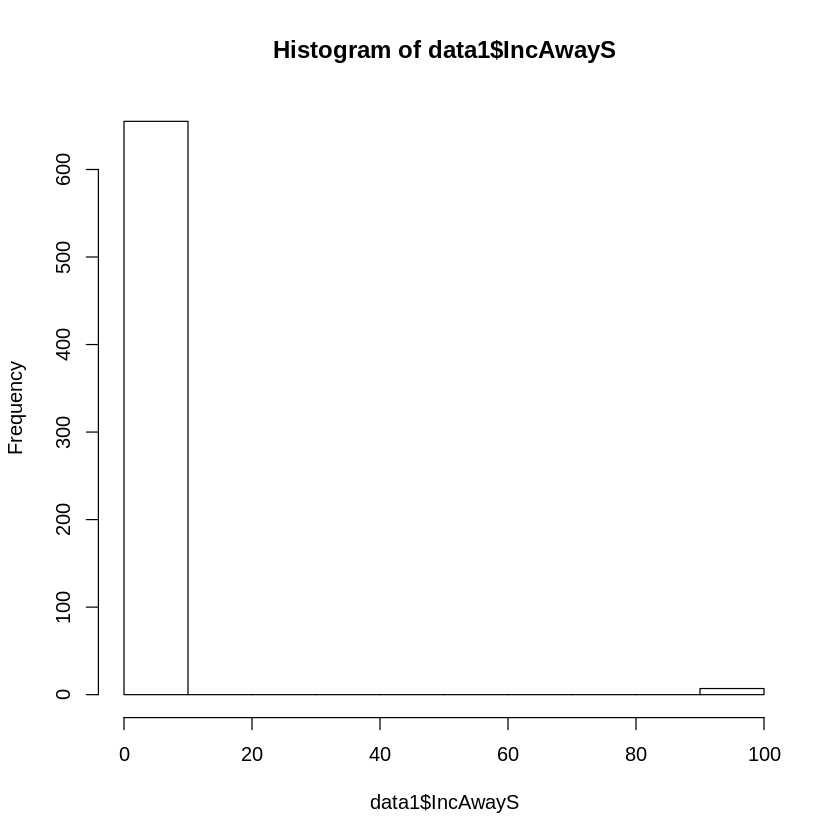

In [45]:
summary(data1$IncAwayS)
table(data1$IncAwayS)
hist(data1$IncAwayS)

In [46]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [47]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 100
[1] 632 100


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       5       7      99 


  1   2   3   4   5   6   7   8  99 
 57  42  64 143  90  70  92  69   5 

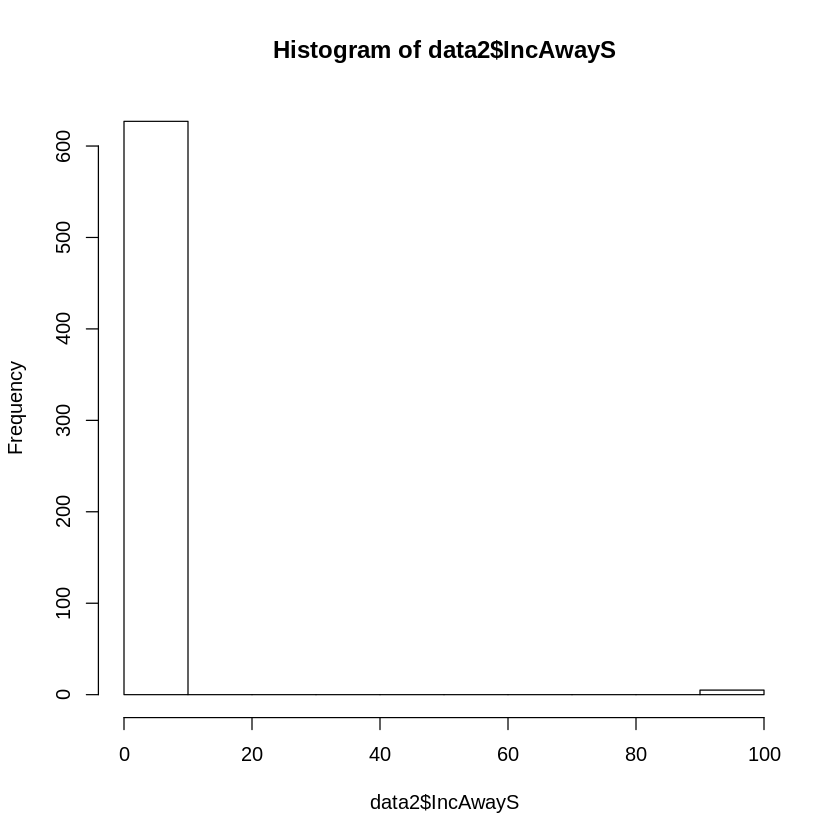

In [48]:
summary(data2$IncAwayS)
table(data2$IncAwayS)
hist(data2$IncAwayS)

In [49]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
 [61] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
 [66] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [71] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [76] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [81] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [86] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [91] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
 [96] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

In [50]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avg",     
"HomeS")

In [51]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
 [61] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
 [66] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [71] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [76] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [81] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [86] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [91] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
 [96] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeS"      "HouseholdS" "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "PBC"        "Political"  "SN"         "SqftCate"  
[21] "SubNorm"    "Summer_avg" "Trust"

In [52]:
data1 <- data2[, which(names(data2) %in% c("IncAwayS",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HomeS"     
[11] "HouseholdS" "IncAwayS"   "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "Political"  "SN"         "SqftCate"   "SubNorm"   
[21] "Summer_avg"

In [53]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [54]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [55]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"      "IncAwayS"   "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "Latitude"   "EnergyC"    "MC"         "ComfNS"    
[16] "Atti"       "SubNorm"    "SN"         "HabitG"     "HabitC"    
[21] "Summer_avg"

In [56]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [57]:
hiCor(data2,.7)

,Latitude,Summer_avg
Latitude,1.00,-0.74
Summer_avg,-0.74,1.00


In [58]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1    -0.4 -0.34 -0.43   -0.36 -0.23   -0.3  -0.28
[1] 0.24
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.26 0.34    0.48      0.5       0.24   0.41
[1] 0.34
    HomeS IncAwayS Latitude ComfNS Summer_avg
PC3 -0.33     0.22     0.57  -0.24      -0.56
[1] 0.41
    HomeS Gender HouseholdS Ethnic Educ HabitC
PC4  0.23  -0.34      -0.54   0.33 0.45   0.25
[1] 0.47
    Political Ethnic Income Educ EnergyC    MC HabitG HabitC
PC5      0.54  -0.24   0.25 0.39    0.25 -0.24  -0.44  -0.27
[1] 0.52
     Age Gender Ethnic Income ComfNS    SN HabitC
PC6 0.44   0.44    0.4  -0.22   0.28 -0.31  -0.22
[1] 0.58
    IncAwayS Ethnic ComfNS SubNorm    SN
PC7     0.47  -0.32  -0.47   -0.32 -0.36
[1] 0.62
    IncAwayS   Age Political Ethnic Educ   MC SubNorm HabitG HabitC
PC8     0.55 -0.36      -0.2   0.32 0.24 0.23    0.22  -0.26  -0.28
[1] 0.66
    IncAwayS  Age HouseholdS    MC  SN
PC9     0.52 0.27       -0.3 -0.33 0.5
[1] 0.71
  

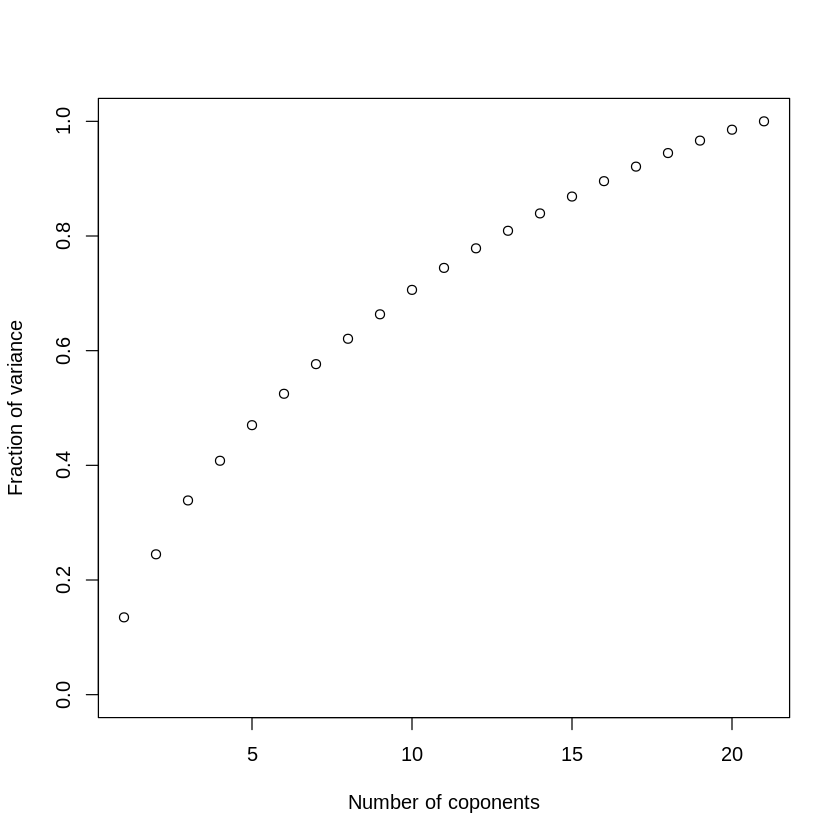

In [59]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [60]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [61]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avg,21,0.48
Latitude,12,0.47
Atti,16,0.43
EnergyC,13,0.39
SqftCate,6,0.36
OwnRent,5,0.32
Income,10,0.27
SubNorm,17,0.26
HouseholdS,7,0.25
MC,14,0.22
HabitG,19,0.22


In [62]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [63]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Summer_avg')

In [64]:
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [65]:
table(data2[,"IncAwayS"])


  1   2   3   4   5   6   7   8  99 
 57  42  64 143  90  70  92  69   5 

In [66]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.93  -2.69  -0.63   1.49  90.43 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.770618   5.431003    0.51    0.610  
Age         -0.000548   0.033788   -0.02    0.987  
Gender       0.407786   0.722076    0.56    0.572  
OwnRent      1.121513   0.785499    1.43    0.154  
SqftCate     0.156317   0.379605    0.41    0.681  
HouseholdS  -0.108264   0.322086   -0.34    0.737  
Political   -0.552115   0.443298   -1.25    0.213  
Ethnic       0.440414   0.930281    0.47    0.636  
Income       0.174537   0.199843    0.87    0.383  
Educ        -0.516369   0.330041   -1.56    0.118  
Latitude     0.199685   0.088879    2.25    0.025 *
EnergyC     -0.198747   0.272494   -0.73    0.466  
MC           0.068648   0.337099    0.20    0.839  
ComfNS      -0.624123   0.242177   -2.58    0.010 *
HabitC      -0.316728   0.251257   -1.26    0.208  
Summer_avg  -0.054296   0.556

In [67]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.64  -1.87  -0.38   1.69  81.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.3887     6.3611    4.15  4.6e-05 ***
Age           0.0329     0.0370    0.89  0.37427    
Gender        0.2649     0.7777    0.34  0.73366    
OwnRent      -0.2564     0.8231   -0.31  0.75570    
SqftCate      0.7968     0.4080    1.95  0.05193 .  
HouseholdS   -0.4722     0.3237   -1.46  0.14579    
Political    -0.3590     0.4930   -0.73  0.46710    
Ethnic       -0.3155     0.9106   -0.35  0.72929    
Income        0.0211     0.2068    0.10  0.91882    
Educ         -0.3990     0.3587   -1.11  0.26695    
Latitude     -0.0109     0.1114   -0.10  0.92222    
EnergyC      -0.5283     0.2995   -1.76  0.07893 .  
MC            0.1595     0.3827    0.42  0.67714    
ComfNS       -0.0711     0.2578   -0.28  0.78294    
HabitC       -0.8237     0.2669   -3

In [70]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-22.04  -3.21  -0.60   1.86  85.83 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.4258    10.6172   -4.18  3.6e-05 ***
Age          -0.0291     0.0495   -0.59    0.557    
Gender        0.6580     1.0872    0.61    0.545    
OwnRent       2.1659     1.2154    1.78    0.076 .  
SqftCate     -0.5298     0.5643   -0.94    0.348    
HouseholdS   -0.1053     0.5145   -0.20    0.838    
Political    -0.6878     0.6507   -1.06    0.291    
Ethnic        1.2602     1.5389    0.82    0.413    
Income        0.4012     0.3071    1.31    0.192    
Educ         -0.5560     0.4912   -1.13    0.258    
Latitude      1.1925     0.2079    5.74  2.1e-08 ***
EnergyC       0.0968     0.4010    0.24    0.809    
MC           -0.0577     0.4875   -0.12    0.906    
ComfNS       -0.5876     0.3702   -1.59    0.113    
HabitC        0.0599     0.3798    0

In [69]:
#17 states with highest average temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.735 -1.466 -0.048  1.527  4.490 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.72363    1.42518    2.61   0.0094 ** 
Age          0.00553    0.01148    0.48   0.6306    
Gender       0.08297    0.23588    0.35   0.7252    
OwnRent      0.07625    0.25949    0.29   0.7691    
SqftCate     0.19859    0.12721    1.56   0.1194    
HouseholdS  -0.08991    0.10094   -0.89   0.3737    
Political   -0.01933    0.14755   -0.13   0.8959    
Ethnic      -0.27551    0.27670   -1.00   0.3201    
Income      -0.00658    0.06307   -0.10   0.9170    
Educ         0.10114    0.10673    0.95   0.3440    
Latitude    -0.01182    0.02631   -0.45   0.6534    
EnergyC     -0.10504    0.08589   -1.22   0.2222    
MC          -0.07633    0.11093   -0.69   0.4919    
ComfNS       0.41351    0.08367    4.94  

In [71]:
#17 middle states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-11.67  -2.76  -0.49   2.47  68.73 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.1148    16.6867    4.62    1e-05 ***
Age           0.0284     0.0666    0.43  0.67027    
Gender       -0.5250     1.4922   -0.35  0.72564    
OwnRent       1.1980     1.6607    0.72  0.47216    
SqftCate      0.6590     0.8041    0.82  0.41420    
HouseholdS   -1.0046     0.7247   -1.39  0.16842    
Political    -0.2213     0.9385   -0.24  0.81400    
Ethnic        1.7459     2.4682    0.71  0.48077    
Income        0.0617     0.4588    0.13  0.89326    
Educ         -0.5970     0.7615   -0.78  0.43463    
Latitude     -1.4155     0.4030   -3.51  0.00064 ***
EnergyC      -1.5600     0.6548   -2.38  0.01886 *  
MC            0.4455     0.6892    0.65  0.51931    
ComfNS       -0.5429     0.5033   -1.08  

In [73]:
#bottom 17 states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-21.04  -5.10  -1.38   2.00  80.66 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -35.3459    19.2359   -1.84   0.0683 . 
Age          -0.0654     0.1157   -0.56   0.5731   
Gender       -0.1595     2.6618   -0.06   0.9523   
OwnRent       5.2310     2.8363    1.84   0.0673 . 
SqftCate     -0.9875     1.2829   -0.77   0.4428   
HouseholdS    0.1571     1.2595    0.12   0.9009   
Political    -0.5824     1.5403   -0.38   0.7059   
Ethnic        0.7810     3.8821    0.20   0.8409   
Income        0.8593     0.7538    1.14   0.2563   
Educ         -0.7999     1.1949   -0.67   0.5043   
Latitude      1.0223     0.3156    3.24   0.0015 **
EnergyC       0.6547     0.9809    0.67   0.5056   
MC           -0.2567     1.2392   -0.21   0.8362   
ComfNS       -1.8459     0.8277   -2.23   0.0273 * 
Hab

In [74]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.8e+00,1.79,0.0084,0.92706
Gender,1,1.3e+02,131.93,0.6205,0.43220
OwnRent,1,9.4e+02,935.91,4.4022,0.03772
SqftCate,1,2.6e+00,2.65,0.0125,0.91127
HouseholdS,1,1.4e+02,138.18,0.6500,0.42151
Political,1,1.5e+02,153.60,0.7225,0.39680
Ethnic,1,1.3e+02,130.38,0.6133,0.43491
Income,1,5.6e+01,56.02,0.2635,0.60856
Educ,1,6.2e+01,62.04,0.2918,0.58994
Latitude,1,3.1e+03,3069.66,14.4386,0.00022


In [75]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
     HomeS   IncAwayS        Age     Gender    OwnRent   SqftCate HouseholdS 
      0.84       0.97       0.99       0.92       1.00       1.00       0.99 
 Political     Ethnic     Income       Educ   Latitude    EnergyC         MC 
      0.94       0.97       0.99       0.98       0.35       0.52       0.78 
    ComfNS       Atti    SubNorm         SN     HabitG     HabitC Summer_avg 
      0.93       0.43       0.75       0.92       0.86       0.89       0.31 

Loadings:
           Factor1 Factor2
EnergyC     0.68          
Atti        0.73          
Latitude           -0.79  
Summer_avg          0.82  
HomeS               0.40  
IncAwayS                  
Age                       
Gender                    
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          

In [168]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + EnergyC + Age + Ethnic + MC + 
    Political + Educ, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.422 -1.111 -0.151  0.985  4.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.38581    0.59224    4.03  6.3e-05 ***
ComfNS       0.37014    0.04774    7.75  3.7e-14 ***
EnergyC     -0.09642    0.05315   -1.81  0.07016 .  
Age          0.02134    0.00617    3.46  0.00058 ***
Ethnic      -0.42435    0.18204   -2.33  0.02007 *  
MC          -0.05075    0.06598   -0.77  0.44208    
Political    0.09324    0.08700    1.07  0.28426    
Educ         0.00636    0.06230    0.10  0.91875    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 619 degrees of freedom
Multiple R-squared:  0.126,	Adjusted R-squared:  0.116 
F-statistic: 12.7 on 7 and 619 DF,  p-value: 2.73e-15


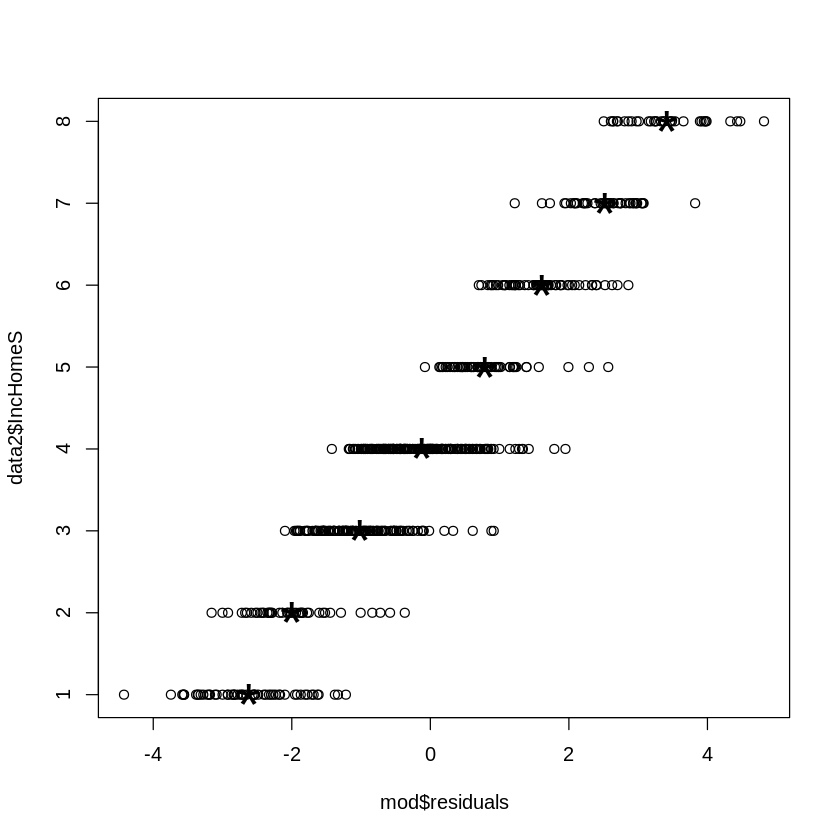

In [169]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [170]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.76  -1.08  -0.18   1.02   4.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53248    0.31962    4.79  2.0e-06 ***
ComfNS       0.37397    0.04712    7.94  9.7e-15 ***
Age          0.01922    0.00612    3.14   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 624 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.107 
F-statistic: 38.6 on 2 and 624 DF,  p-value: <2e-16


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

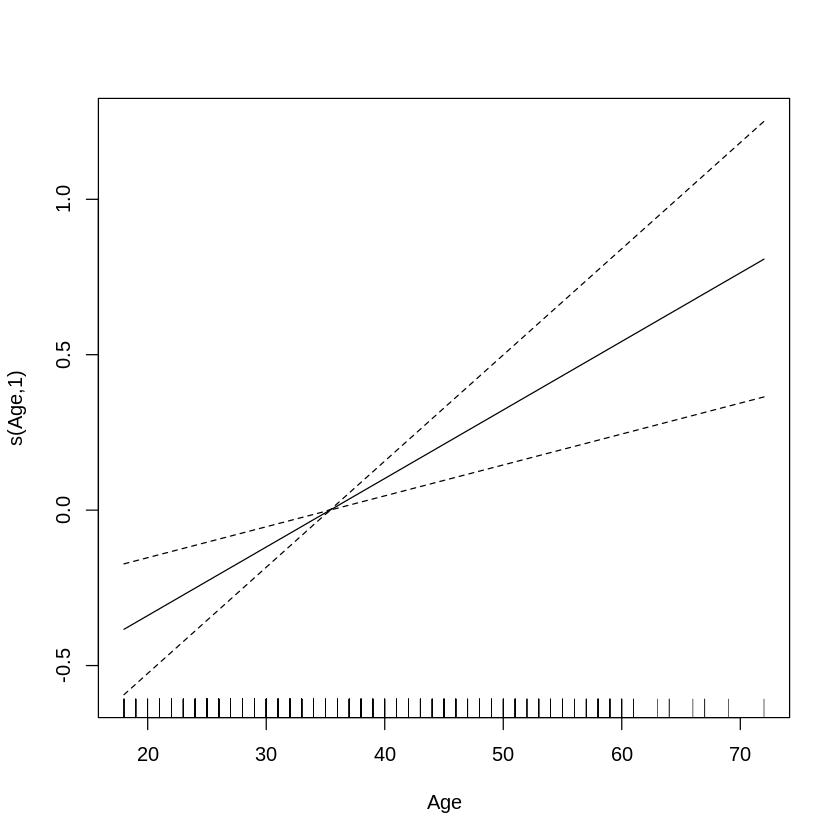

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



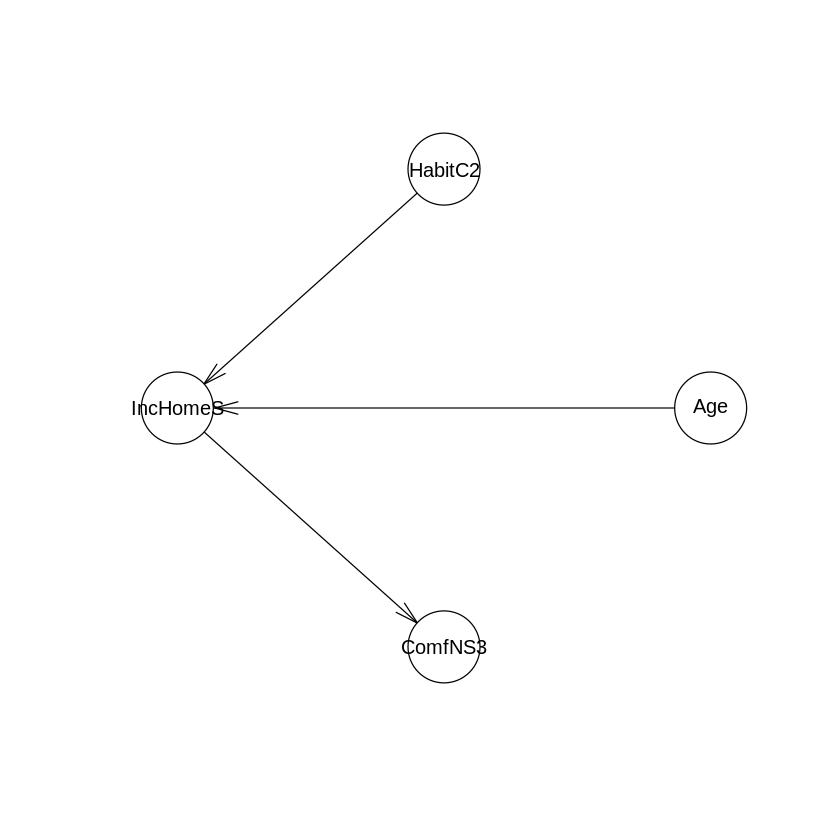

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

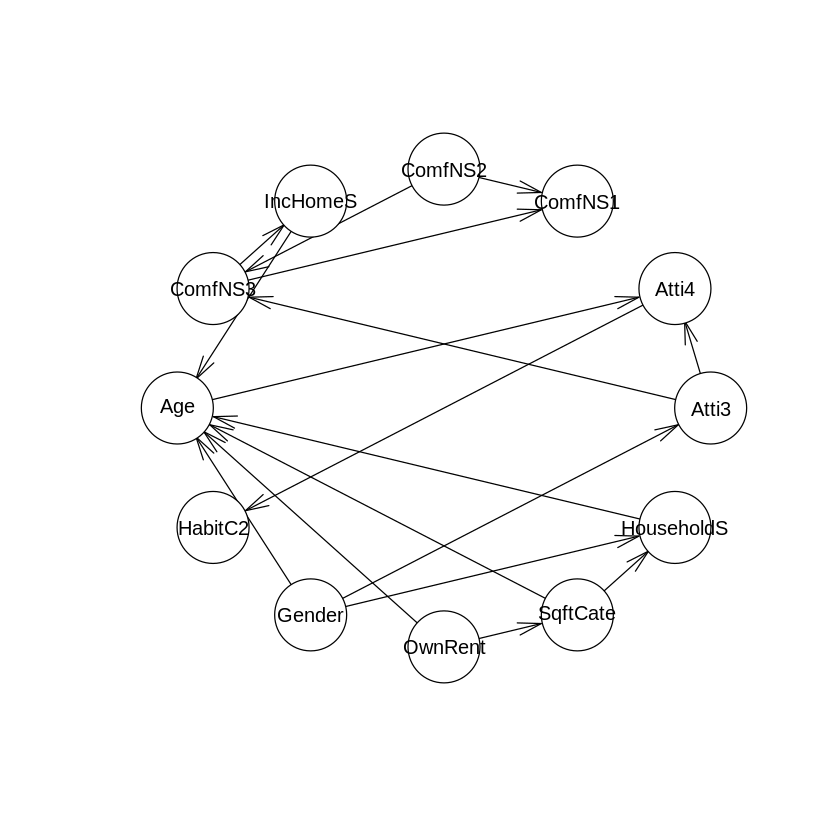

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)